# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import nltk
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.multioutput import MultiOutputClassifier
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  f1_score,precision_score,recall_score,accuracy_score,make_scorer
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
nltk.download('wordnet') # download for lemmatization
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# load data from database
engine = create_engine('sqlite:///etl.db')
df = pd.read_sql_table("message_table",engine)
X = df['message']
Y = df.drop(['id', 'message', 'original', 'genre'], axis = 1)

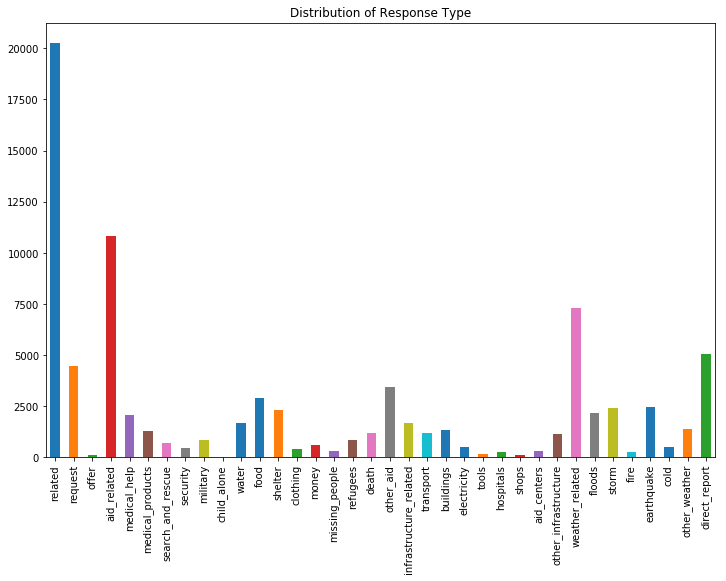

In [3]:
plt.figure(figsize=(12,8))
Y.sum().plot(kind='bar')
plt.title("Distribution of Response Type")
plt.savefig("Distribution of Response Type.png",dpi=300)

### 2. Write a tokenization function to process your text data

In [4]:
def tokenize(text):
    # Normalize text
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    # Tokenize text
    words = word_tokenize(text)
    words = [w for w in words if w not in stopwords.words("english")]
    # Reduce words to their stems
    words = [PorterStemmer().stem(w) for w in words]
    words = [WordNetLemmatizer().lemmatize(w) for w in words]

    return words

In [5]:
tokenize(X[0])

['weather', 'updat', 'cold', 'front', 'cuba', 'could', 'pas', 'haiti']

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [6]:
# compute bag of word counts and tf-idf values
vectorizer = TfidfVectorizer( tokenizer=tokenize ,use_idf=True, smooth_idf=True, sublinear_tf=False)


# clf = MultiOutputClassifier(RandomForestClassifier(random_state = 42))
clf = RandomForestClassifier(random_state = 42)

pipeline = Pipeline([('vectorizer',vectorizer), ('clf',clf)])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [8]:
# do prediction
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [9]:
def get_metrics(test_value, predicted_value):
    """
    get_metrics calculates f1 score, accuracy and recall

    Args:
        test_value (list): list of actual values
        predicted_value (list): list of predicted values

    Returns:
        dictionray: a dictionary with accuracy, f1 score, precision and recall
    """
    accuracy = accuracy_score(test_value,predicted_value)
    precision =round( precision_score(test_value,predicted_value,average='micro'))
    recall = recall_score(test_value,predicted_value,average='micro')
    f1 = f1_score(test_value,predicted_value,average='micro')
    return {'Accuracy':accuracy, 'f1 score':f1,'Precision':precision, 'Recall':recall}

In [10]:
train_results = []
for i,column in enumerate(y_train.columns):
    result = get_metrics(y_train.loc[:,column].values,y_pred_train[:,i])
    train_results.append(result)
train_results_df = pd.DataFrame(train_results)
train_results_df    

Accuracy  Precision    Recall  f1 score
0   0.991595        1.0  0.991595  0.991595
1   0.987520        1.0  0.987520  0.987520
2   0.998981        1.0  0.998981  0.998981
3   0.982529        1.0  0.982529  0.982529
4   0.985890        1.0  0.985890  0.985890
5   0.991188        1.0  0.991188  0.991188
6   0.994550        1.0  0.994550  0.994550
7   0.994804        1.0  0.994804  0.994804
8   0.993786        1.0  0.993786  0.993786
9   1.000000        1.0  1.000000  1.000000
10  0.993123        1.0  0.993123  0.993123
11  0.992308        1.0  0.992308  0.992308
12  0.991697        1.0  0.991697  0.991697
13  0.998217        1.0  0.998217  0.998217
14  0.994957        1.0  0.994957  0.994957
15  0.997198        1.0  0.997198  0.997198
16  0.993938        1.0  0.993938  0.993938
17  0.993225        1.0  0.993225  0.993225
18  0.979778        1.0  0.979778  0.979778
19  0.986043        1.0  0.986043  0.986043
20  0.990984        1.0  0.990984  0.990984
21  0.991493        1.0  0.991493  0.991493
22  0.996027        1.0  0.996027  0.996027
23  0.998064        1.0  0.998064  0.998064
24  0.996995        1.0  0.996995  0.996995
25  0.998930        1.0  0.998930  0.998930
26  0.997198        1.0  0.997198  0.997198
27  0.990169        1.0  0.990169  0.990169
28  0.986705        1.0  0.986705  0.986705
29  0.991035        1.0  0.991035  0.991035
30  0.992665        1.0  0.992665  0.992665
31  0.997351        1.0  0.997351  0.997351
32  0.993633        1.0  0.993633  0.993633
33  0.995721        1.0  0.995721  0.995721
34  0.989507        1.0  0.989507  0.989507
35  0.982885        1.0  0.982885  0.982885

In [11]:
test_results = []
for i,column in enumerate(y_test.columns):
    result = get_metrics(y_test.loc[:,column].values,y_pred_test[:,i])
    test_results.append(result)
test_results_df = pd.DataFrame(test_results)
test_results_df

Accuracy  Precision    Recall  f1 score
0   0.818182        1.0  0.818182  0.818182
1   0.878533        1.0  0.878533  0.878533
2   0.995569        1.0  0.995569  0.995569
3   0.731092        1.0  0.731092  0.731092
4   0.914286        1.0  0.914286  0.914286
5   0.951872        1.0  0.951872  0.951872
6   0.971887        1.0  0.971887  0.971887
7   0.983040        1.0  0.983040  0.983040
8   0.968831        1.0  0.968831  0.968831
9   1.000000        1.0  1.000000  1.000000
10  0.943468        1.0  0.943468  0.943468
11  0.917494        1.0  0.917494  0.917494
12  0.921008        1.0  0.921008  0.921008
13  0.986402        1.0  0.986402  0.986402
14  0.979526        1.0  0.979526  0.979526
15  0.989305        1.0  0.989305  0.989305
16  0.962108        1.0  0.962108  0.962108
17  0.955386        1.0  0.955386  0.955386
18  0.870741        1.0  0.870741  0.870741
19  0.929106        1.0  0.929106  0.929106
20  0.951719        1.0  0.951719  0.951719
21  0.946524        1.0  0.946524  0.946524
22  0.981971        1.0  0.981971  0.981971
23  0.993888        1.0  0.993888  0.993888
24  0.988541        1.0  0.988541  0.988541
25  0.993583        1.0  0.993583  0.993583
26  0.986860        1.0  0.986860  0.986860
27  0.953247        1.0  0.953247  0.953247
28  0.844309        1.0  0.844309  0.844309
29  0.939037        1.0  0.939037  0.939037
30  0.924370        1.0  0.924370  0.924370
31  0.989916        1.0  0.989916  0.989916
32  0.949427        1.0  0.949427  0.949427
33  0.979679        1.0  0.979679  0.979679
34  0.946371        1.0  0.946371  0.946371
35  0.848739        1.0  0.848739  0.848739

### 6. Improve your model
Use grid search to find better parameters. 

In [12]:
# write custom scoring for multiclass classifier
def multi_class_score(y_true, y_pred):
    accuracy_results = []
    for i,column in enumerate(y_train.columns):
        accuracy = accuracy_score(y_true.loc[:,column].values,y_pred[:,i])
        accuracy_results.append(accuracy)
    avg_accuracy = np.mean(accuracy_results)
    return avg_accuracy

In [13]:
score = make_scorer(multi_class_score)

In [14]:
parameters = {'clf__criterion':['gini','entropy'],
 'clf__max_features': ['auto', 'sqrt'],
 'clf__max_depth': [5,10],
              'clf__random_state': [42]}

cv_rf_tuned = GridSearchCV(pipeline, param_grid=parameters, scoring=score,
                  n_jobs = -1, cv = 2, refit = True, return_train_score=True,verbose=3)
cv_rf_tuned.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] clf__criterion=gini, clf__max_depth=5, clf__max_features=auto, clf__random_state=42 
[CV] clf__criterion=gini, clf__max_depth=5, clf__max_features=auto, clf__random_state=42 
[CV] clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__random_state=42 
[CV] clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__random_state=42 
[CV] clf__criterion=gini, clf__max_depth=10, clf__max_features=auto, clf__random_state=42 
[CV] clf__criterion=gini, clf__max_depth=10, clf__max_features=auto, clf__random_state=42 
[CV] clf__criterion=gini, clf__max_depth=10, clf__max_features=sqrt, clf__random_state=42 
[CV] clf__criterion=gini, clf__max_depth=10, clf__max_features=sqrt, clf__random_state=42 
[CV] clf__criterion=entropy, clf__max_depth=5, clf__max_features=auto, clf__random_state=42 
[CV] clf__criterion=entropy, clf__max_depth=5, clf__max_features=auto, clf__random_state=42 
[CV] clf__criterion=entropy, c

[Parallel(n_jobs=-1)]: Done   3 out of  16 | elapsed: 48.7min remaining: 211.1min


[CV]  clf__criterion=gini, clf__max_depth=5, clf__max_features=auto, clf__random_state=42, score=0.9280115231368288, total=32.3min
[CV]  clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__random_state=42, score=0.9272219958344652, total=32.3min
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__max_features=auto, clf__random_state=42, score=0.9272021869057322, total=32.2min
[CV]  clf__criterion=gini, clf__max_depth=10, clf__max_features=auto, clf__random_state=42, score=0.929214208095626, total=32.6min
[CV]  clf__criterion=entropy, clf__max_depth=10, clf__max_features=auto, clf__random_state=42, score=0.9293274019741014, total=32.1min
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__max_features=sqrt, clf__random_state=42, score=0.9276210042560898, total=32.4min


[Parallel(n_jobs=-1)]: Done   9 out of  16 | elapsed: 48.9min remaining: 38.1min


[CV]  clf__criterion=entropy, clf__max_depth=10, clf__max_features=auto, clf__random_state=42, score=0.9278558815539255, total=32.5min
[CV]  clf__criterion=gini, clf__max_depth=10, clf__max_features=sqrt, clf__random_state=42, score=0.929214208095626, total=32.7min
[CV]  clf__criterion=gini, clf__max_depth=5, clf__max_features=sqrt, clf__random_state=42, score=0.9280115231368288, total=32.6min
[CV]  clf__criterion=gini, clf__max_depth=10, clf__max_features=sqrt, clf__random_state=42, score=0.9278841800235443, total=32.3min
[CV]  clf__criterion=gini, clf__max_depth=5, clf__max_features=auto, clf__random_state=42, score=0.9272219958344652, total=32.7min
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__max_features=auto, clf__random_state=42, score=0.9276210042560898, total=32.8min
[CV]  clf__criterion=entropy, clf__max_depth=10, clf__max_features=sqrt, clf__random_state=42, score=0.9293274019741014, total=32.8min


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 49.0min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__criterion': ['gini', 'entropy'], 'clf__max_features': ['auto', 'sqrt'], 'clf__max_depth': [5, 10], 'clf__random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(multi_class_score), verbose=3)

In [15]:
cv_rf_tuned.best_params_


{'clf__criterion': 'entropy',
 'clf__max_depth': 10,
 'clf__max_features': 'auto',
 'clf__random_state': 42}

In [16]:
best_model_rf_tuned = cv_rf_tuned.best_estimator_


In [17]:
cv_rf_tuned.best_score_

0.92859164176401332

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [18]:
y_pred_train = best_model_rf_tuned.predict(X_train)
y_pred_test = best_model_rf_tuned.predict(X_test)

In [19]:
train_results = []
for i,column in enumerate(y_train.columns):
    result = get_metrics(y_train.loc[:,column].values,y_pred_train[:,i])
    train_results.append(result)
train_results_df = pd.DataFrame(train_results)
train_results_df

Accuracy  Precision    Recall  f1 score
0   0.760646        1.0  0.760646  0.760646
1   0.831398        1.0  0.831398  0.831398
2   0.995518        1.0  0.995518  0.995518
3   0.615271        1.0  0.615271  0.615271
4   0.923085        1.0  0.923085  0.923085
5   0.950591        1.0  0.950591  0.950591
6   0.973054        1.0  0.973054  0.973054
7   0.981714        1.0  0.981714  0.981714
8   0.966993        1.0  0.966993  0.966993
9   1.000000        1.0  1.000000  1.000000
10  0.937806        1.0  0.937806  0.937806
11  0.888396        1.0  0.888396  0.888396
12  0.913916        1.0  0.913916  0.913916
13  0.984311        1.0  0.984311  0.984311
14  0.976212        1.0  0.976212  0.976212
15  0.988590        1.0  0.988590  0.988590
16  0.968623        1.0  0.968623  0.968623
17  0.955736        1.0  0.955736  0.955736
18  0.868633        1.0  0.868633  0.868633
19  0.937398        1.0  0.937398  0.937398
20  0.955634        1.0  0.955634  0.955634
21  0.951355        1.0  0.951355  0.951355
22  0.978963        1.0  0.978963  0.978963
23  0.993989        1.0  0.993989  0.993989
24  0.989558        1.0  0.989558  0.989558
25  0.996027        1.0  0.996027  0.996027
26  0.988947        1.0  0.988947  0.988947
27  0.957162        1.0  0.957162  0.957162
28  0.727639        1.0  0.727639  0.727639
29  0.918399        1.0  0.918399  0.918399
30  0.907294        1.0  0.907294  0.907294
31  0.989099        1.0  0.989099  0.989099
32  0.905460        1.0  0.905460  0.905460
33  0.980084        1.0  0.980084  0.980084
34  0.948299        1.0  0.948299  0.948299
35  0.806744        1.0  0.806744  0.806744

In [20]:
test_results = []
for i,column in enumerate(y_test.columns):
    result = get_metrics(y_test.loc[:,column].values,y_pred_test[:,i])
    test_results.append(result)
test_results_df = pd.DataFrame(test_results)
test_results_df

Accuracy  Precision    Recall  f1 score
0   0.754927        1.0  0.754927  0.754927
1   0.823988        1.0  0.823988  0.823988
2   0.995569        1.0  0.995569  0.995569
3   0.602750        1.0  0.602750  0.602750
4   0.914591        1.0  0.914591  0.914591
5   0.948969        1.0  0.948969  0.948969
6   0.970817        1.0  0.970817  0.970817
7   0.983040        1.0  0.983040  0.983040
8   0.968220        1.0  0.968220  0.968220
9   1.000000        1.0  1.000000  1.000000
10  0.932773        1.0  0.932773  0.932773
11  0.890909        1.0  0.890909  0.890909
12  0.907716        1.0  0.907716  0.907716
13  0.985638        1.0  0.985638  0.985638
14  0.979374        1.0  0.979374  0.979374
15  0.989152        1.0  0.989152  0.989152
16  0.961650        1.0  0.961650  0.961650
17  0.952024        1.0  0.952024  0.952024
18  0.869213        1.0  0.869213  0.869213
19  0.928801        1.0  0.928801  0.928801
20  0.951108        1.0  0.951108  0.951108
21  0.944691        1.0  0.944691  0.944691
22  0.982124        1.0  0.982124  0.982124
23  0.993888        1.0  0.993888  0.993888
24  0.988541        1.0  0.988541  0.988541
25  0.993583        1.0  0.993583  0.993583
26  0.986860        1.0  0.986860  0.986860
27  0.953247        1.0  0.953247  0.953247
28  0.731092        1.0  0.731092  0.731092
29  0.920092        1.0  0.920092  0.920092
30  0.907105        1.0  0.907105  0.907105
31  0.989916        1.0  0.989916  0.989916
32  0.910160        1.0  0.910160  0.910160
33  0.979679        1.0  0.979679  0.979679
34  0.945760        1.0  0.945760  0.945760
35  0.806417        1.0  0.806417  0.806417

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [21]:
# knc
parameters = {
#     'clf__kernel': ['linear', 'rbf'],
    'clf__n_neighbors':[1, 2]
}
knc_clf = KNeighborsClassifier()
pipeline = Pipeline([('vectorizer',vectorizer), ('clf',knc_clf)])


clf_kn = GridSearchCV(pipeline, param_grid=parameters, scoring=score,
                  n_jobs = -1, cv = 2, refit = True, return_train_score=True,verbose=2)

clf_kn.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] clf__n_neighbors=1 ..............................................
[CV] clf__n_neighbors=1 ..............................................
[CV] clf__n_neighbors=2 ..............................................
[CV] clf__n_neighbors=2 ..............................................
[CV] ............................... clf__n_neighbors=1, total= 7.5min
[CV] ............................... clf__n_neighbors=1, total= 7.6min
[CV] ............................... clf__n_neighbors=2, total= 7.6min
[CV] ............................... clf__n_neighbors=2, total= 7.6min


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 11.6min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__n_neighbors': [1, 2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(multi_class_score), verbose=2)

In [22]:
clf_kn.best_score_

0.92819263334238877

In [23]:
clf_kn.best_estimator_

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...owski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform'))])

In [24]:
clf_kn.best_params_

{'clf__n_neighbors': 2}

In [25]:
best_model_kn = clf_kn.best_estimator_

In [26]:
y_pred_train = best_model_kn.predict(X_train)
y_pred_test = best_model_kn.predict(X_test)

In [27]:
train_results = []
for i,column in enumerate(y_train.columns):
    result = get_metrics(y_train.loc[:,column].values,y_pred_train[:,i])
    train_results.append(result)
train_results_df = pd.DataFrame(train_results)
train_results_df 

Accuracy  Precision    Recall  f1 score
0   0.969438        1.0  0.969438  0.969438
1   0.867971        1.0  0.867971  0.867971
2   0.995518        1.0  0.995518  0.995518
3   0.639619        1.0  0.639619  0.639619
4   0.926090        1.0  0.926090  0.926090
5   0.953189        1.0  0.953189  0.953189
6   0.973462        1.0  0.973462  0.973462
7   0.981663        1.0  0.981663  0.981663
8   0.967044        1.0  0.967044  0.967044
9   1.000000        1.0  1.000000  1.000000
10  0.944682        1.0  0.944682  0.944682
11  0.907753        1.0  0.907753  0.907753
12  0.922117        1.0  0.922117  0.922117
13  0.986145        1.0  0.986145  0.986145
14  0.977180        1.0  0.977180  0.977180
15  0.988947        1.0  0.988947  0.988947
16  0.968826        1.0  0.968826  0.968826
17  0.957416        1.0  0.957416  0.957416
18  0.876681        1.0  0.876681  0.876681
19  0.937958        1.0  0.937958  0.937958
20  0.956041        1.0  0.956041  0.956041
21  0.953392        1.0  0.953392  0.953392
22  0.979269        1.0  0.979269  0.979269
23  0.993938        1.0  0.993938  0.993938
24  0.989507        1.0  0.989507  0.989507
25  0.996078        1.0  0.996078  0.996078
26  0.988692        1.0  0.988692  0.988692
27  0.957722        1.0  0.957722  0.957722
28  0.753158        1.0  0.753158  0.753158
29  0.920436        1.0  0.920436  0.920436
30  0.911165        1.0  0.911165  0.911165
31  0.989099        1.0  0.989099  0.989099
32  0.926956        1.0  0.926956  0.926956
33  0.980389        1.0  0.980389  0.980389
34  0.948757        1.0  0.948757  0.948757
35  0.837052        1.0  0.837052  0.837052

In [28]:
test_results = []
for i,column in enumerate(y_test.columns):
    result = get_metrics(y_test.loc[:,column].values,y_pred_test[:,i])
    test_results.append(result)
test_results_df = pd.DataFrame(test_results)
test_results_df

Accuracy  Precision    Recall  f1 score
0   0.196944        0.0  0.196944  0.196944
1   0.837739        1.0  0.837739  0.837739
2   0.995569        1.0  0.995569  0.995569
3   0.597097        1.0  0.597097  0.597097
4   0.913980        1.0  0.913980  0.913980
5   0.949274        1.0  0.949274  0.949274
6   0.970970        1.0  0.970970  0.970970
7   0.983040        1.0  0.983040  0.983040
8   0.968220        1.0  0.968220  0.968220
9   1.000000        1.0  1.000000  1.000000
10  0.932773        1.0  0.932773  0.932773
11  0.895798        1.0  0.895798  0.895798
12  0.910313        1.0  0.910313  0.910313
13  0.985485        1.0  0.985485  0.985485
14  0.979679        1.0  0.979679  0.979679
15  0.989305        1.0  0.989305  0.989305
16  0.961650        1.0  0.961650  0.961650
17  0.952788        1.0  0.952788  0.952788
18  0.869824        1.0  0.869824  0.869824
19  0.928648        1.0  0.928648  0.928648
20  0.951108        1.0  0.951108  0.951108
21  0.945302        1.0  0.945302  0.945302
22  0.982124        1.0  0.982124  0.982124
23  0.993888        1.0  0.993888  0.993888
24  0.988388        1.0  0.988388  0.988388
25  0.993583        1.0  0.993583  0.993583
26  0.986860        1.0  0.986860  0.986860
27  0.953247        1.0  0.953247  0.953247
28  0.737357        1.0  0.737357  0.737357
29  0.920244        1.0  0.920244  0.920244
30  0.908633        1.0  0.908633  0.908633
31  0.989916        1.0  0.989916  0.989916
32  0.921008        1.0  0.921008  0.921008
33  0.979832        1.0  0.979832  0.979832
34  0.945913        1.0  0.945913  0.945913
35  0.816960        1.0  0.816960  0.816960

### 9. Export your model as a pickle file

In [29]:
import pickle

In [30]:
# save the model to disk
filename = 'best_model_bi.pkl'
pickle.dump(cv_rf_tuned, open(filename, 'wb'))

### 10. Use this notebook to complete `train_classifier.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.